In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import requests

from sklearn.model_selection import train_test_split
from numpy import random
from torch import nn
try:
  from torchsummary import summary
except:
  !pip install torchsummary
  from torchsummary import summary

try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy

from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

#new 
from torchvision import models
from torchvision import transforms
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 6.8 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-u4czlrp9
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-u4czlrp9
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp39-cp39-linux_x86_64.whl size=397995 sha256=9f898d50fa6df2c6832a86c792cb51cabb7a402dae2074dfb4353352bdc9eca7
  Stored in directory: /tmp/pip-ephem-wheel-cache-d40ndk_d/wheels/13/c1/d6/a321055f7089f1a6af654fbf794536b196999f082a9cb68a37
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.6
    Uninstalling pycocotools-2.0.6:
      Successfully uninstalled pycocotools-2.0.6


In [3]:
from pathlib import Path
import sys
path_root = Path("gdrive/MyDrive/res").parents[0]
print(path_root)
sys.path.append(str(path_root))
print(sys.path)

gdrive/MyDrive
['/content', '/env/python', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.9/dist-packages/IPython/extensions', '/root/.ipython', 'gdrive/MyDrive']


In [4]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [5]:
'''
download the helper functions
'''
helper_file = "helper_funs.py"
helper_functions = requests.get("https://raw.githubusercontent.com/NoumanAhmad448/deep_learning_pytorch_python_computer_vision/master/helper_funs.py")
with open(helper_file, "wb") as module:
  module.write(helper_functions.content)


In [6]:
from helper_funs import change_device

from helper_funs import show_image


In [7]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

torch.device(DEVICE)

device(type='cuda')

In [8]:
from torchvision.datasets import CIFAR10

In [9]:
def transform_operation():
  return transforms.Compose([
          transforms.Resize((256, 256)),
          transforms.RandomHorizontalFlip(),
          transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
          transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15),
          transforms.ToTensor(),
          transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
  ])

In [10]:
from torch.utils.data import Dataset

In [11]:
def make_capitalize(str_:str=None):
  if str_ is None:
    return
  return str_.capitalize()

In [12]:
ROOT_DIR = "data"
SPLIT = "letters"
train_data = CIFAR10(
    root=ROOT_DIR,
    download=True,
    # split=SPLIT,
    transform=ToTensor()
)

test_data = CIFAR10(
    root=ROOT_DIR,
    train=False,
    download=True,
    # split=SPLIT,
    transform=ToTensor()
)

100%|██████████| 170498071/170498071 [00:13<00:00, 13090296.08it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [13]:
# train_data.transform = transform_operation
# test_data.transform = transform_operation

In [14]:
train_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [15]:
train_classes = train_data.classes
print(len(train_data))
print(len(test_data))

50000
10000


TypeError: ignored

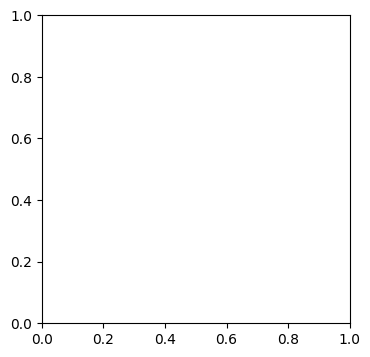

In [16]:
sample_index  = torch.randint(len(train_data), size=(1,)).item()
# print(train_data.data[sample_index])
# print(type(train_data))
show_image(train_data.data[sample_index], make_capitalize(train_classes[train_data.targets[sample_index]]))

In [17]:
BATCH = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH, shuffle=True)
# print(len(train_dataloader))
# print(len(test_dataloader))

# X_train , y_train = next(iter(train_dataloader))
# sample_index = torch.randint(len(range(BATCH)), size=(1,)).item()
# show_image(X_train[sample_index], label=train_classes[y_train[sample_index]])

In [18]:
# train_classes = SAMPLED_INDEX
print(f"type-> {type(train_classes)} len->{len(train_classes)}")


type-> <class 'list'> len->10


In [19]:
b, (x,y) = next(enumerate(train_dataloader))
x.shape

torch.Size([32, 3, 32, 32])

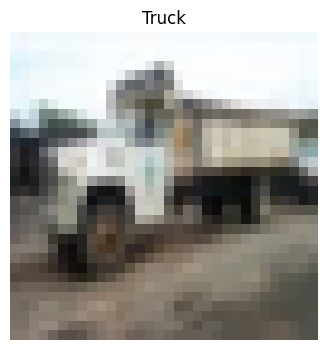

In [20]:
sample_index = torch.randint(len(x), size=(1,)).item()
show_image(image=x[sample_index], label=make_capitalize(train_classes[y[sample_index]]), is_img_rgb=True)
# show_multi_images(data=x, classes=train_classes)


In [21]:
class FashtionClassification(nn.Module):
  def __init__(self,input_channel,hidden_channel,output_channel):
    super().__init__()
    self.input_channel = input_channel
    self.hidden_channel = hidden_channel
    self.output_channel = output_channel

    self.layer1 = nn.Sequential(
                               nn.Conv2d(in_channels=self.input_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.MaxPool2d(kernel_size=2,padding=1,stride=2)
    )
    self.layer2 = nn.Sequential(
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3)
                                ,nn.MaxPool2d(kernel_size=2,padding=1,stride=2)
    )
    self.layer21 = nn.Sequential(
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3)
                                ,nn.MaxPool2d(kernel_size=2,padding=1,stride=2)
    )
    self.layer3 = nn.Sequential(
                                nn.Flatten(),
                                nn.Linear(in_features=1152, out_features=100),
                                nn.ReLU(),
                                nn.Linear(in_features=100, out_features=self.output_channel)    ,                         
                                nn.ReLU(),
    )

  
  def forward(self,x):
    return self.layer3(self.layer2(self.layer1(x)))



In [22]:
model0 = models.vgg16(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 240MB/s]


In [23]:
# model0 = change_device(FashtionClassification(input_channel=3,hidden_channel=32,output_channel=len(train_classes)), device=DEVICE)

In [24]:
model0 = change_device(tensor=model0,device=DEVICE)

In [25]:
model0

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [26]:
summary(model0, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

In [27]:
class CustomClassificationModel(nn.Module):
  def __init__(self, model_layers:int=1000,output_layer:int=100):
    super().__init__()
    self.net = model0
    self.classifier = nn.Sequential(
            nn.Linear(in_features=model_layers,out_features=300),
            nn.ReLU(),
            # nn.Dropout(p=0.3),
            # nn.Linear(in_features=output_layer+300,out_features=output_layer+200),
            # nn.ReLU(),
            # nn.Dropout(p=0.2),
            nn.Linear(in_features=300,out_features=output_layer)
            )
    for p in self.net.parameters():
      p.requires_grad = False
    
  def forward(self,x):
    return self.classifier(self.net(x))

In [28]:
train_model = change_device(CustomClassificationModel(model_layers=1000,output_layer=len(train_classes)), device=
                            DEVICE)

In [29]:
train_model

CustomClassificationModel(
  (net): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=Tr

In [30]:
model0.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [31]:
summary(train_model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

In [32]:
train_model.classifier

Sequential(
  (0): Linear(in_features=1000, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=10, bias=True)
)

In [33]:
DEVICE

'cuda'

In [34]:
model0 = train_model

In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model0.parameters(), lr=0.0001)

In [36]:
EPOCHS = 5
total_batches = 0
loss_metrics = []
accuracy_metrics = []

accuracy_fn = change_device(Accuracy(task="multiclass", num_classes=len(train_classes)),device=DEVICE)

for epoch in range(EPOCHS):
  model0.train()
  for batch, (X_data, y_train) in enumerate(train_dataloader):
    # print(f"epoch -> {batch} X_data->{X_data.shape} y_train->{y_train.shape}")
    # break
    X_data = change_device(tensor=X_data, device=DEVICE)
    y_train = change_device(tensor=y_train, device=DEVICE)

    y_pred = model0(X_data)#.to(torch.cuda.FloatTensor))
    # print(y_pred.shape)
    loss = loss_fn(y_pred,y_train)
    acc = accuracy_fn(y_pred,y_train)
    
    # if batch%20 == 0:
    #   loss_metrics.append(loss.item())
    #   accuracy_metrics.append(acc.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  for batch, (X_test, y_test) in enumerate(test_dataloader):
    # print(f"epoch -> {batch} X_test->{X_test.shape} y_test->{y_test.shape}")
    # break
    X_test = change_device(tensor=X_test, device=DEVICE)
    y_test = change_device(tensor=y_test, device=DEVICE)

    y_pred = model0(X_test)
    # print(y_pred.shape)
    loss_test = loss_fn(y_pred,y_test)
    acc_test = accuracy_fn(y_pred,y_test)  
    
    if batch%100 == 0:
      loss_metrics.append(loss.item())
      # accuracy_metrics.append(acc.item())
      print(f"loss-> {loss:.5f} loss_test->{loss_test:.5f} acc-> {acc:.5f} acc_test {acc_test:.5f}")
  # print(loss)
# print(loss_metrics[-1])
# print(accuracy_metrics[-1])

loss-> 1.97780 loss_test->1.62538 acc-> 0.25000 acc_test 0.46875
loss-> 1.97780 loss_test->1.60044 acc-> 0.25000 acc_test 0.53125
loss-> 1.97780 loss_test->1.90008 acc-> 0.25000 acc_test 0.28125
loss-> 1.97780 loss_test->1.70581 acc-> 0.25000 acc_test 0.40625
loss-> 1.63057 loss_test->1.51678 acc-> 0.62500 acc_test 0.46875
loss-> 1.63057 loss_test->1.96353 acc-> 0.62500 acc_test 0.34375
loss-> 1.63057 loss_test->1.68430 acc-> 0.62500 acc_test 0.40625
loss-> 1.63057 loss_test->1.66037 acc-> 0.62500 acc_test 0.37500
loss-> 1.56747 loss_test->1.65423 acc-> 0.50000 acc_test 0.50000
loss-> 1.56747 loss_test->1.64067 acc-> 0.50000 acc_test 0.43750
loss-> 1.56747 loss_test->1.59374 acc-> 0.50000 acc_test 0.43750
loss-> 1.56747 loss_test->1.82885 acc-> 0.50000 acc_test 0.37500
loss-> 1.61512 loss_test->1.50109 acc-> 0.50000 acc_test 0.46875
loss-> 1.61512 loss_test->1.53203 acc-> 0.50000 acc_test 0.40625
loss-> 1.61512 loss_test->1.96123 acc-> 0.50000 acc_test 0.37500
loss-> 1.61512 loss_test-

In [37]:
model0.eval()
with torch.inference_mode():
  for batch, (X_test,y_test) in enumerate(test_dataloader):
    X_test = change_device(X_test, device=DEVICE)
    y_test = change_device(y_test, device=DEVICE)
    
    y_pred_test = model0(X_test)
    loss_test = loss_fn(y_pred_test,y_test)
    acc = accuracy_fn(y_pred_test,y_test)
  print(f"loss -> {loss_test:.5f} acc->{acc:.5f}")

loss -> 1.18129 acc->0.62500
